In [1]:
## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [3]:
ESI = pd.read_csv('~renoodle/Downloads/Employee Satisfaction Index.csv')

In [4]:
#Recode Activity into a New Variable

In [5]:
ESI.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [6]:
## Dropping Columns

In [7]:
emsain = ESI[['age', 'Dept', 'location', 'job_level', 'recruitment_type', 'rating', 'satisfied', 'education', 'onsite']]

In [8]:
emsain.head()

,age,Dept,location,job_level,recruitment_type,rating,satisfied,education,onsite
0,28,HR,Suburb,5,Referral,2,1,PG,0
1,50,Technology,Suburb,3,Walk-in,5,0,PG,1
2,43,Technology,Suburb,4,Referral,1,0,UG,0
3,44,Sales,City,2,On-Campus,3,1,PG,1
4,33,HR,City,2,Recruitment Agency,1,1,UG,0


In [9]:
## Changing Dept, recruitment_typelocation and education to integers

In [10]:
def Dept (series):
    if series == "HR":
        return 0
    if series == "Marketing":
        return 1
    if series == "Purchasing":
        return 2
    if series == "Sales":
        return 3
    if series == "Technology":
        return 4

In [11]:
def education (series):
    if series == "PG":
        return 0
    if series == "UG":
        return 1

In [21]:
def location (series):
    if series == "City":
        return 0
    if series == "Suburb":
        return 1

In [22]:
emsain.head()

,age,Dept,location,job_level,recruitment_type,rating,satisfied,education,onsite,Dept1,recruitment_type1,education1
0,28,HR,Suburb,5,Referral,2,1,PG,0,0,2,0
1,50,Technology,Suburb,3,Walk-in,5,0,PG,1,4,3,0
2,43,Technology,Suburb,4,Referral,1,0,UG,0,4,2,1
3,44,Sales,City,2,On-Campus,3,1,PG,1,3,0,0
4,33,HR,City,2,Recruitment Agency,1,1,UG,0,0,1,1


In [23]:
emsain['Dept1'] = emsain['Dept'].apply(Dept)

/var/folders/dy/3cj_6r_563b7v9s2jh41rn8m0000gn/T/ipykernel_12241/1192735450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emsain['Dept1'] = emsain['Dept'].apply(Dept)


In [24]:
emsain.head()

,age,Dept,location,job_level,recruitment_type,rating,satisfied,education,onsite,Dept1,recruitment_type1,education1
0,28,HR,Suburb,5,Referral,2,1,PG,0,0,2,0
1,50,Technology,Suburb,3,Walk-in,5,0,PG,1,4,3,0
2,43,Technology,Suburb,4,Referral,1,0,UG,0,4,2,1
3,44,Sales,City,2,On-Campus,3,1,PG,1,3,0,0
4,33,HR,City,2,Recruitment Agency,1,1,UG,0,0,1,1


In [25]:
def recruitment_type (series):
    if series == "On-Campus":
        return 0
    if series == "Recruitment Agency":
        return 1
    if series == "Referral":
        return 2
    if series == "Walk-in":
        return 3

In [26]:
emsain['recruitment_type1'] = emsain['recruitment_type'].apply(recruitment_type)

/var/folders/dy/3cj_6r_563b7v9s2jh41rn8m0000gn/T/ipykernel_12241/3563280524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emsain['recruitment_type1'] = emsain['recruitment_type'].apply(recruitment_type)


In [27]:
emsain['education1'] = emsain['education'].apply(education)

/var/folders/dy/3cj_6r_563b7v9s2jh41rn8m0000gn/T/ipykernel_12241/2671813348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emsain['education1'] = emsain['education'].apply(education)


In [28]:
emsain['Dept1'] = emsain['Dept'].apply(Dept)

/var/folders/dy/3cj_6r_563b7v9s2jh41rn8m0000gn/T/ipykernel_12241/1192735450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emsain['Dept1'] = emsain['Dept'].apply(Dept)


In [29]:
emsain['location1'] = emsain['location'].apply(location)

/var/folders/dy/3cj_6r_563b7v9s2jh41rn8m0000gn/T/ipykernel_12241/4189490208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emsain['location1'] = emsain['location'].apply(location)


In [30]:
emsain.head()

,age,Dept,location,job_level,recruitment_type,rating,satisfied,education,onsite,Dept1,recruitment_type1,education1,location1
0,28,HR,Suburb,5,Referral,2,1,PG,0,0,2,0,1
1,50,Technology,Suburb,3,Walk-in,5,0,PG,1,4,3,0,1
2,43,Technology,Suburb,4,Referral,1,0,UG,0,4,2,1,1
3,44,Sales,City,2,On-Campus,3,1,PG,1,3,0,0,0
4,33,HR,City,2,Recruitment Agency,1,1,UG,0,0,1,1,0


In [31]:
# Testing for Linearity and Normality

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

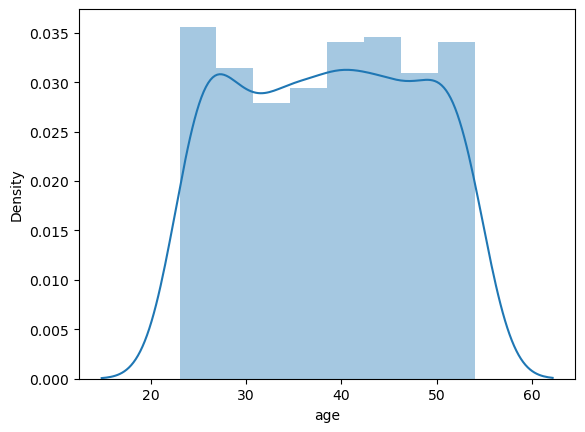

In [32]:
sns.distplot(emsain['age'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfied', ylabel='Density'>

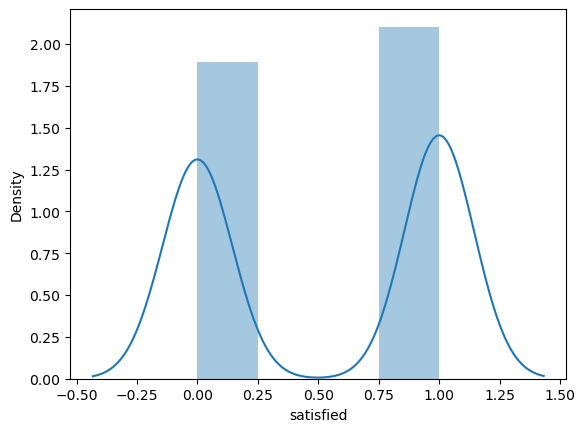

In [33]:
sns.distplot(emsain['satisfied'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

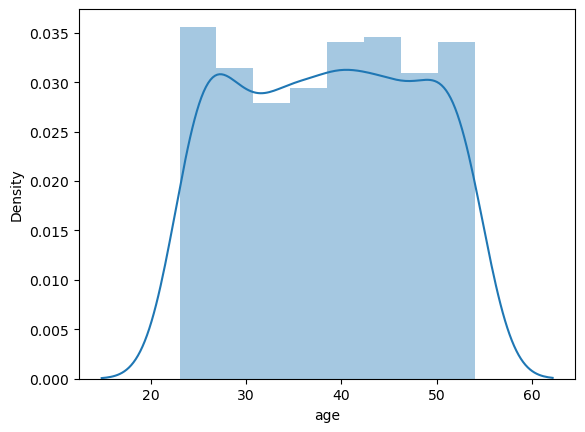

In [34]:
sns.distplot(emsain['age'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='location1', ylabel='Density'>

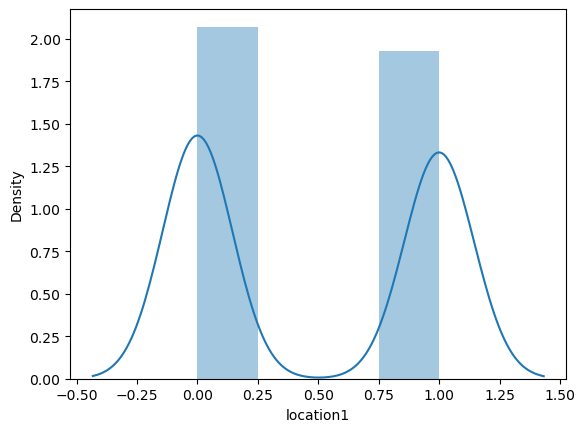

In [35]:
sns.distplot(emsain['location1'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='onsite', ylabel='Density'>

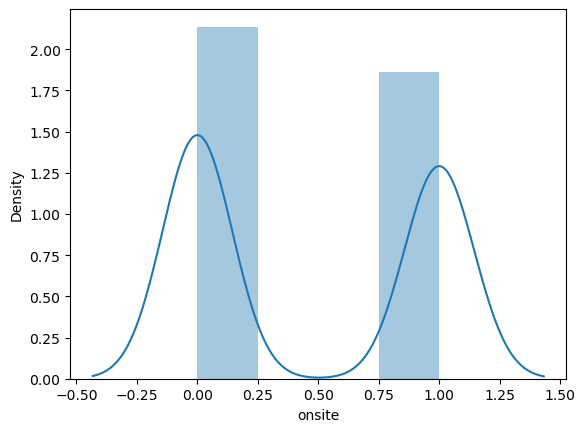

In [36]:
sns.distplot(emsain['onsite'])

In [37]:
emsain.to_csv('emsain.csv,index=TRUE')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

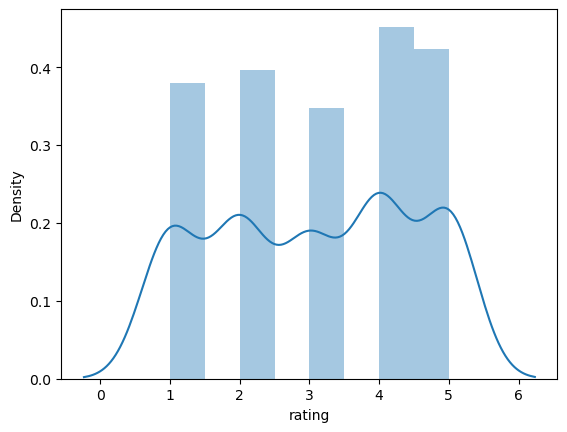

In [38]:
sns.distplot(emsain['rating'])

In [39]:
# Testing for Homoscedasticity

In [40]:
x = emsain['satisfied']
y = emsain['rating']

In [41]:
model = sm.OLS(y,x).fit()

In [42]:
print(model)

In [43]:
pred_val = model.fittedvalues.copy()
true_val = emsain['satisfied'].values.copy()
residual = true_val - pred_val

In [44]:
pred_val = model.fittedvalues.copy()
true_val = emsain['rating'].values.copy()
residual = true_val - pred_val

In [45]:
sms.diagnostic.het_breuschpagan(residual, emsain[['satisfied']])

(12.010628997840833, nan, 12.281627892046954, 0.0004986262045604675)

In [46]:
sms.diagnostic.het_breuschpagan(residual, ESI[['rating']])

(262.5066014567057, nan, 551.5555166179364, 1.0564526973610858e-82)

In [47]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=14.309774611344556, pvalue=3.9430572232127936e-39)

In [48]:
transformed, _ = boxcox(ESI['rating'])

In [49]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.187e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:59:16   Log-Likelihood:                         -368.58
No. Observations:                 500   AIC:                                      739.2
Df Residuals:                     499   BIC:                                      743.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6245      0.011    147.882      0.000       1.603       1.646
==============================================================================
Omnibus:                      121.702   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.262
Skew:                           0.609   Prob(JB):                     7.39e-12
Kurtosis:                       2.012   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred_val = model1.fittedvalues.copy()
true_val = ESI['satisfied'].values.copy()
residual = true_val - pred_val

In [51]:
pred_val = model1.fittedvalues.copy()
true_val = ESI['rating'].values.copy()
residual = true_val - pred_val

In [52]:
# Testing for Multicollinearity

In [53]:
emsain.corr()

,age,job_level,rating,satisfied,onsite,Dept1,recruitment_type1,education1,location1
age,1.000000,-0.057528,-0.096388,0.004490,-0.054055,0.058815,0.043458,-0.011481,0.058575
job_level,-0.057528,1.000000,0.081829,0.010093,-0.054843,-0.038130,0.072776,0.014423,-0.007632
rating,-0.096388,0.081829,1.000000,0.093024,0.009079,-0.007573,-0.062106,0.054200,-0.026293
satisfied,0.004490,0.010093,0.093024,1.000000,0.027637,0.048077,-0.033818,-0.027208,-0.030188
onsite,-0.054055,-0.054843,0.009079,0.027637,1.000000,-0.031563,-0.061201,0.051037,-0.002455
Dept1,0.058815,-0.038130,-0.007573,0.048077,-0.031563,1.000000,-0.007883,0.003809,-0.053267
recruitment_type1,0.043458,0.072776,-0.062106,-0.033818,-0.061201,-0.007883,1.000000,-0.063192,0.019606
education1,-0.011481,0.014423,0.054200,-0.027208,0.051037,0.003809,-0.063192,1.000000,-0.092648
location1,0.058575,-0.007632,-0.026293,-0.030188,-0.002455,-0.053267,0.019606,-0.092648,1.000000
